Imagine standing at the check-out counter at the grocery store with a long line behind you and the cashier not-so-quietly announces that your card has been declined. As you step aside, embarrassed, and allow the cashier to tend to the next customer, you receive a text message from your credit card company: "Press 1 if you really tried to spend $500 on cheddar cheese."

Institute of Electrical and Electronics Engineers Computational Intelligence Society (IEEE-CIS) wants to improve this fraud prevention system and the customer experience, improving the efficacy of fradulent transaction alerts for people around the world and helping businesses reduce their fraud loss and increase their revenue. With higher accuracy fraud detection, you can get on with your snacks without the hassle.

The following data was provided by Vesta Corporation, the forerunner in guaranteed e-commerce payment solutions.

# Load the required libararies

In [88]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from data_sampling import data_sampling
from data_processing_cleaning import *
import matplotlib.pyplot as plt
import seaborn as sns
from visualizations import *
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from training import *
import time
import pickle
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, f1_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the Main data set

In [2]:
#data_transaction_all = pd.read_csv('ieee-fraud-detection/train_transaction.csv')
#data_identity_all = pd.read_csv('ieee-fraud-detection/train_identity.csv')

### Get a sample dataset from the main dataset

In [3]:
#data_sampling(data_transaction_all, data_identity_all, sampling_number=50000)
#del data_transaction_all, data_identity_all
df_IEEE = pd.read_csv('Data/Sampled_IEEE_data.csv')
#print(df_IEEE.shape)
df_IEEE.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,had_id
0,3489170,0,13173065,107.95,W,7919,194.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3091870,0,2077368,105.95,W,16132,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3366827,0,9499922,67.95,W,16075,514.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3556300,0,15103578,40.00,W,7069,111.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3044040,0,1311752,69.48,W,10972,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df_IEEE.shape)

(50000, 435)


### Processing Data for EDA

In [5]:
# Reduce the memory usage of the input dataframe
#df_IEEE = reduce_mem_usage(df_IEEE, verbose=True)

In [6]:
#What type of data we have on our data?
#resumetable(df_IEEE.iloc[:,:10])

In [7]:
# How many cols, rows, missing values we have?
print('The number of datapoints is:', df_IEEE.shape[0])
print('The number of features is:', df_IEEE.shape[1])
print('The number of columns with missing values', sum(df_IEEE.isna().sum() != 0))
print('The number of columns with more than 70% missing values', sum(df_IEEE.isna().sum() > 0.7 * df_IEEE.shape[0]))

The number of datapoints is: 50000
The number of features is: 435
The number of columns with missing values 415
The number of columns with more than 70% missing values 209


In [8]:
# Clean the data for plotting and EDA
df_IEEE = data_cleaning_for_EDA(df_IEEE)

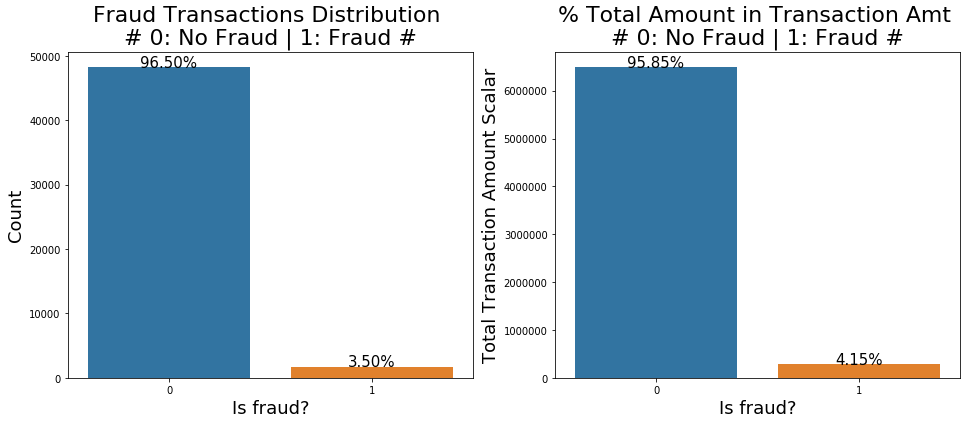

In [9]:
# What's the Transactions values distribution of fraud and no fraud transactions?
plot_distributions_target(df_IEEE)

As seen, the dataset is highly imbalanced and about 96.5% of the data belongs to the "No Fraud" class.

In addition, about 95.6% of the total transactions are not fraud while 4.15% of transactions are fraud.

What features or target shows some interesting patterns?

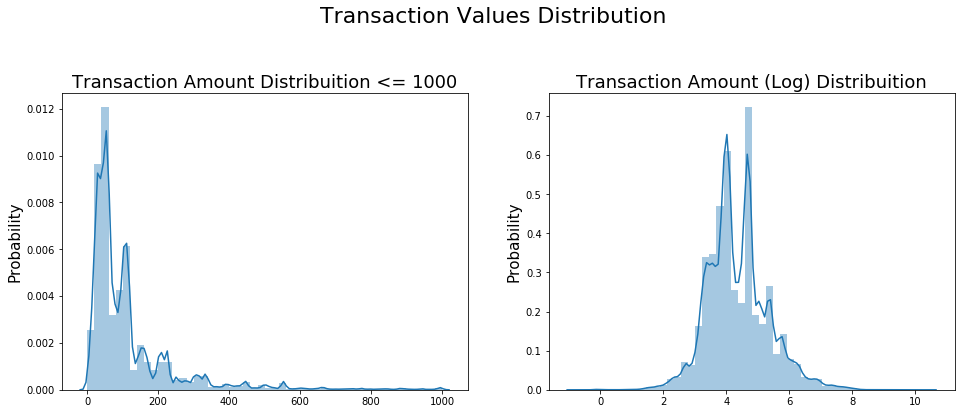

<Figure size 1152x864 with 0 Axes>

In [10]:
transactions_distribution(df_IEEE)
plt.show()

## To remove outliers

In [11]:
# lets a look at the quantile of the "TransactionAmt"
#df_IEEE['TransactionAmt'] = df_IEEE['TransactionAmt'].astype(float)
print("Transaction Amounts Quantiles:")
print(df_IEEE['TransactionAmt'].quantile([.01, .025, .1, .25, .5, .75, .9, .975, .99]))

Transaction Amounts Quantiles:
0.010       9.54583
0.025      14.62200
0.100      26.00000
0.250      43.95000
0.500      68.95000
0.750     125.00000
0.900     279.48100
0.975     652.03700
0.990    1104.00000
Name: TransactionAmt, dtype: float64


In [12]:
# plt.figure(figsize = (12, 6))
# df_IEEE_WO = df_IEEE.loc[df_IEEE['TransactionAmt'] < df_IEEE['TransactionAmt'].quantile(0.99)]

# sns.violinplot(y = 'TransactionAmt', data= df_IEEE_WO, orient = 'v', x='isFraud');

In [13]:
df_IEEE  = remove_otliers(df_IEEE, ['TransactionAmt'])

Identified outliers for TransactionAmt is 702
The percentage of outliers for TransactionAmt is 1.4


### ProductCD Feature

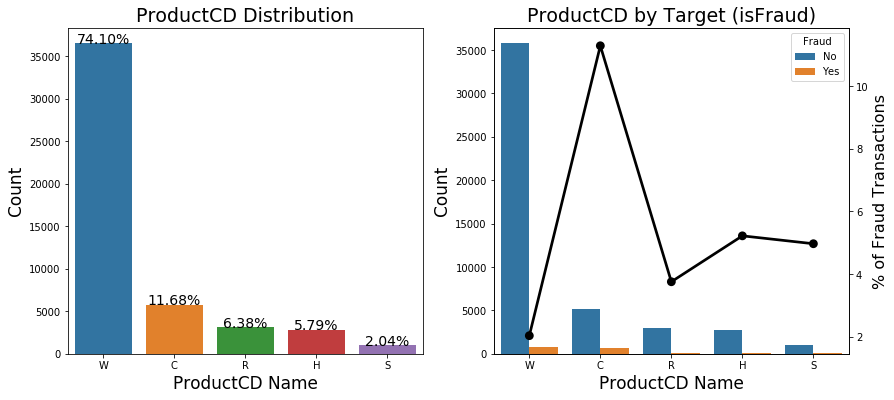

In [14]:
#Distribution of Products
#Distribution of Frauds by Product
Distribution_feature_fraud(df_IEEE, 'ProductCD', rotation = 0, feature_distribution=True)

 W, C and R are the most frequent values.
 
For W, H, and R, the distribution of Fraud values are slightly higher than the Non-Fraud Transactions

### Card 4 Feature

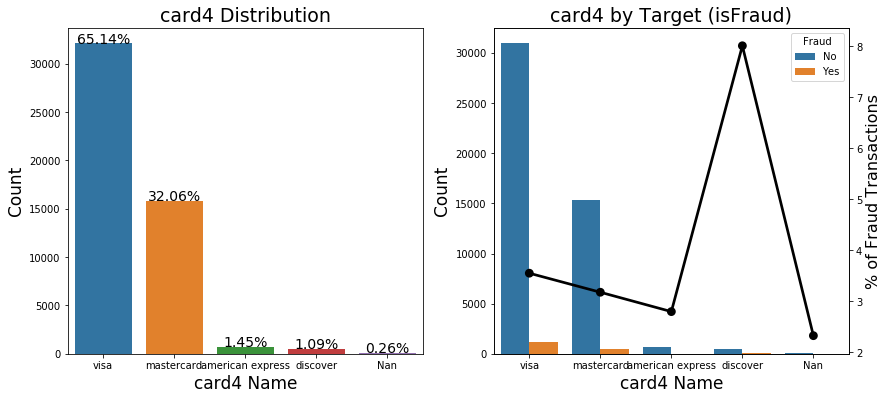

In [15]:
#Distribution of Card 4
#Distribution of Frauds by Card 4
Distribution_feature_fraud(df_IEEE.copy(), 'card4', loc = 1)

The highest fraud is for discover

### Card 6 Feature

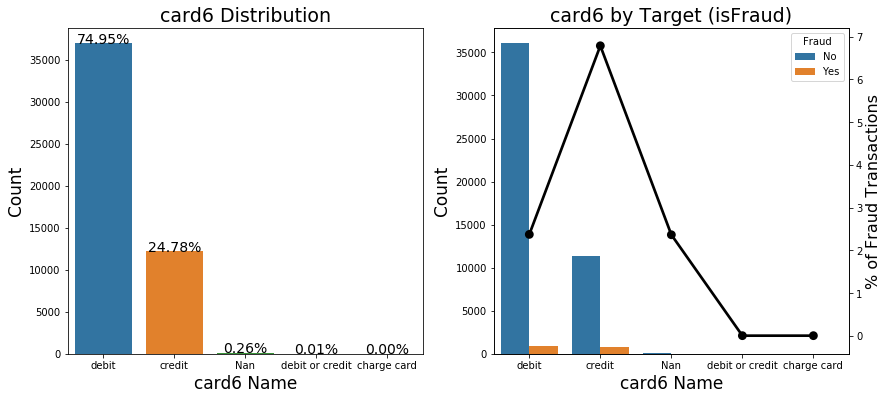

In [16]:
#Distribution of Card 6
#Distribution of Frauds by Card 6
Distribution_feature_fraud(df_IEEE.copy(), 'card6', loc = 1)

The highest percentage of fraud is for credit card.

### M features

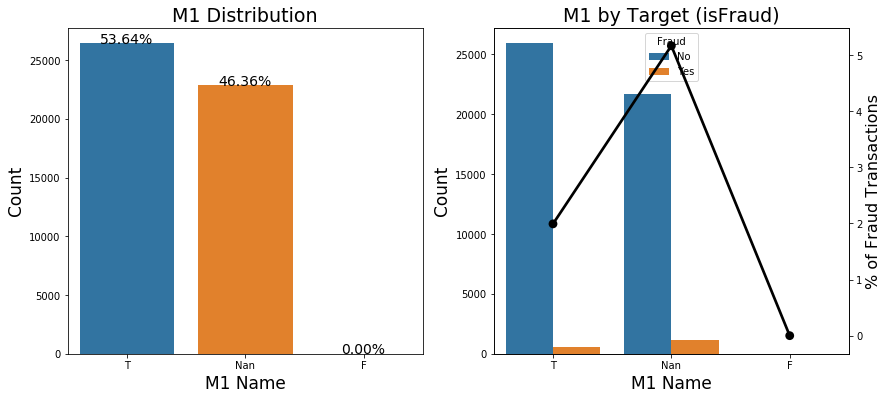

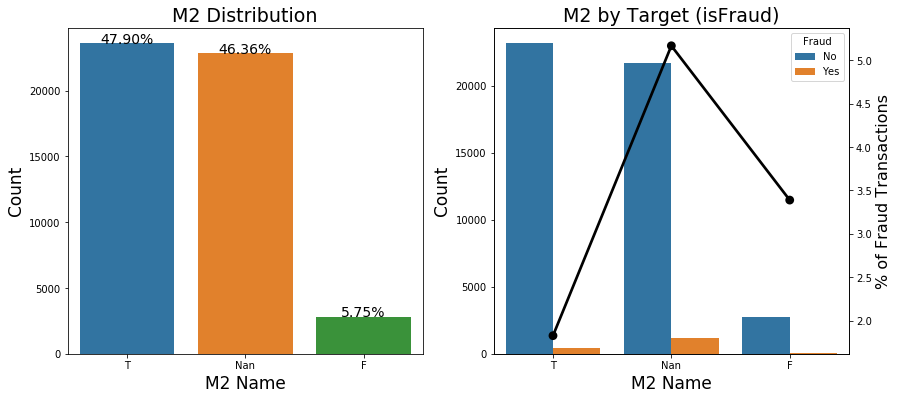

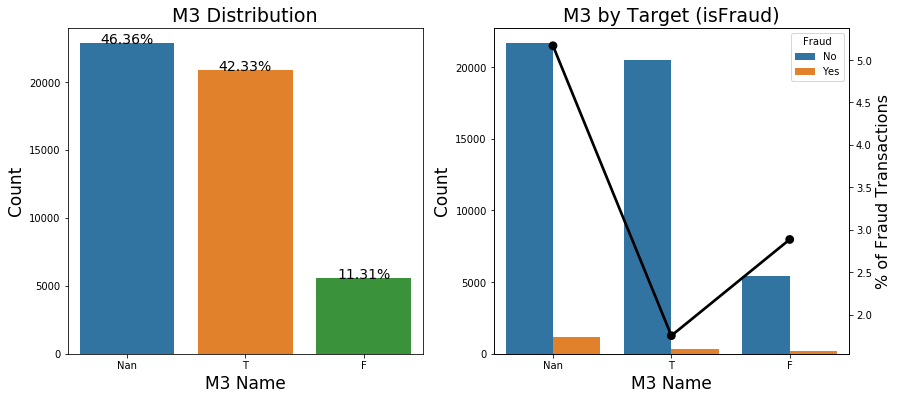

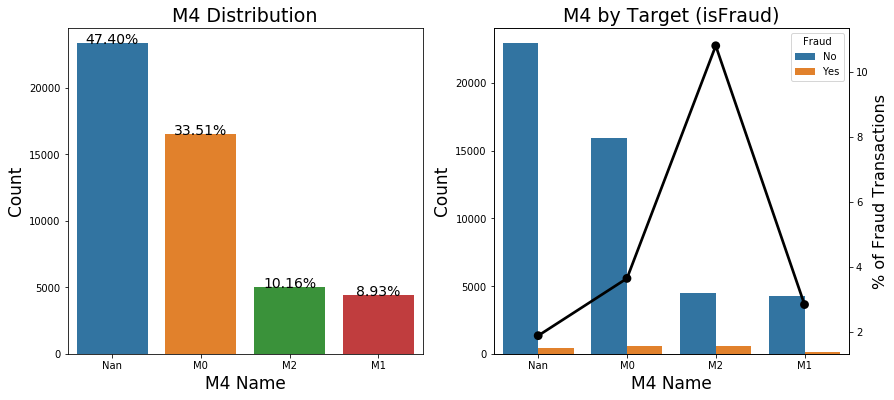

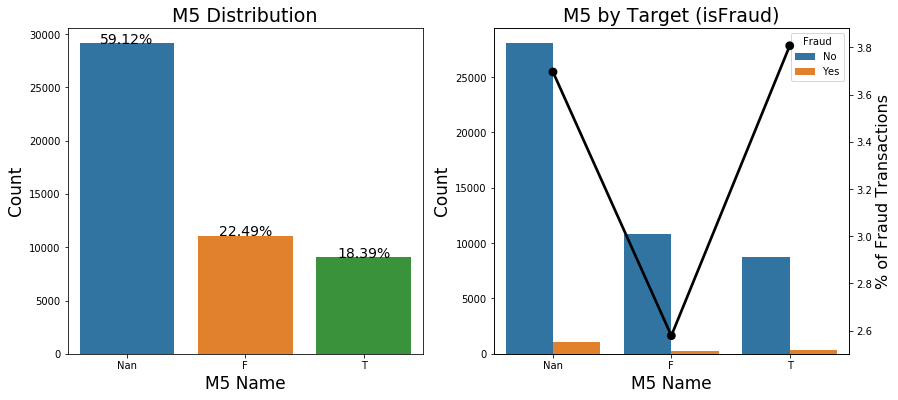

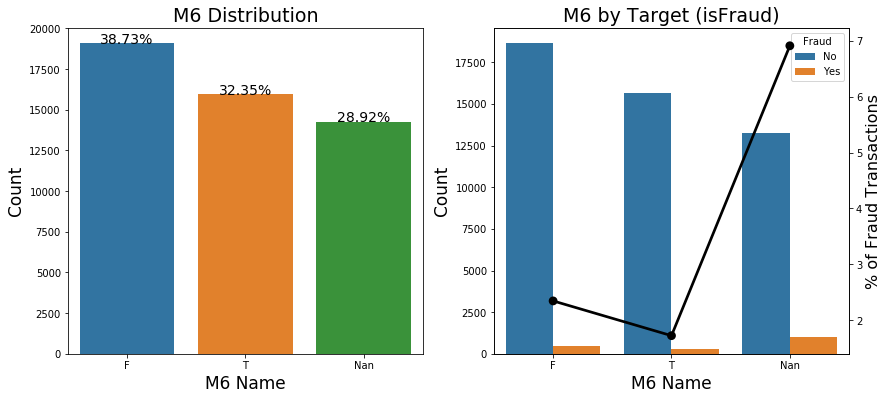

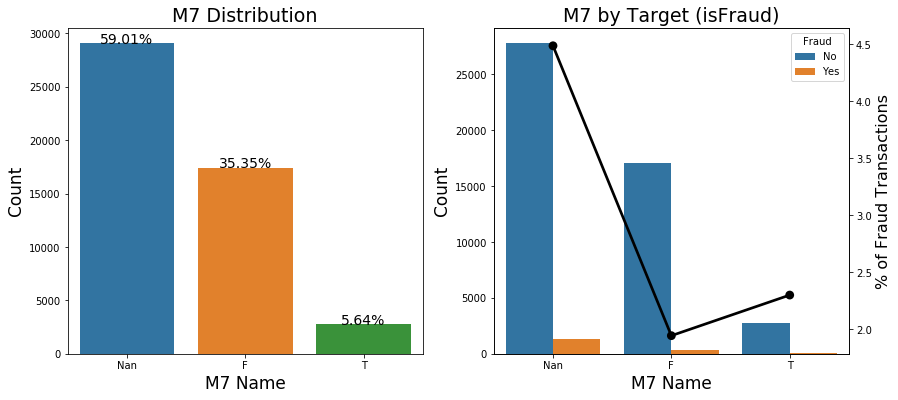

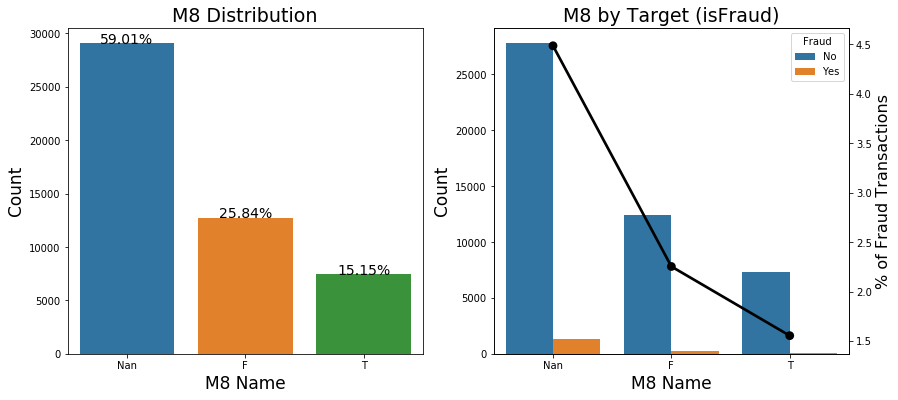

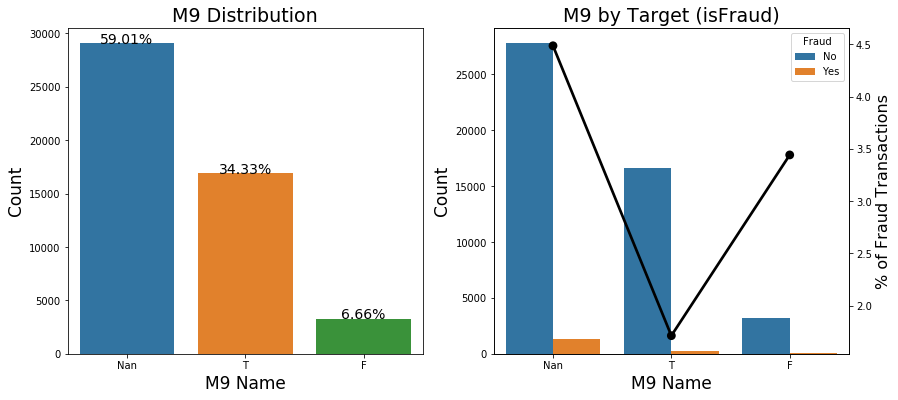

In [17]:
for col in ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']:
    Distribution_feature_fraud(df_IEEE, col)

We can see that the highest percentage of fraud is for always for missing values (but not for M4)

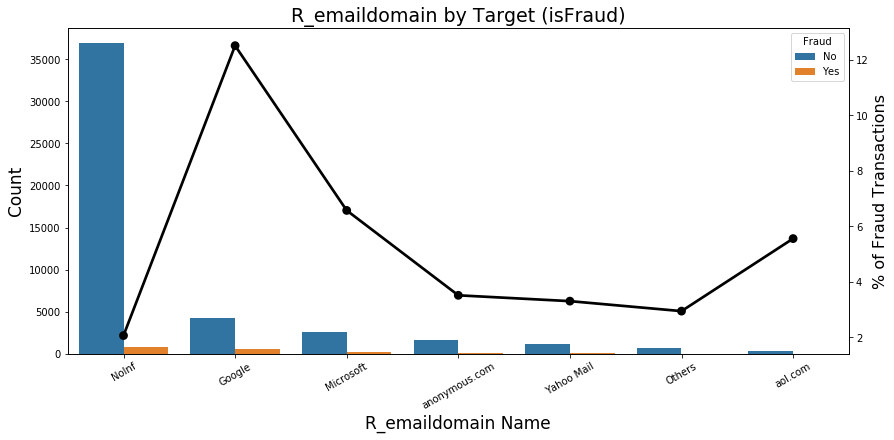

In [18]:
Distribution_feature_fraud(df_IEEE.copy(), 'R_emaildomain', rotation = 30, feature_distribution=False)

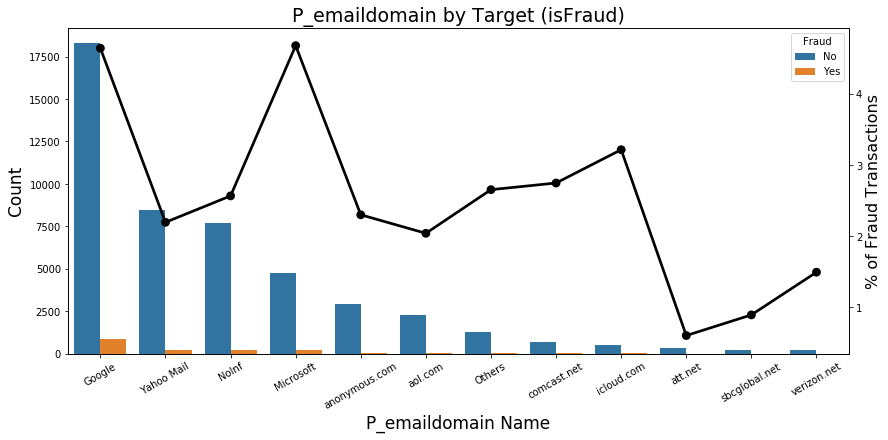

In [19]:
Distribution_feature_fraud(df_IEEE.copy(), 'P_emaildomain', rotation = 30, feature_distribution=False)

For both "P_emaildomain" and "R_emaildomain", the highest percentage of Fraud is for google and Microsoft

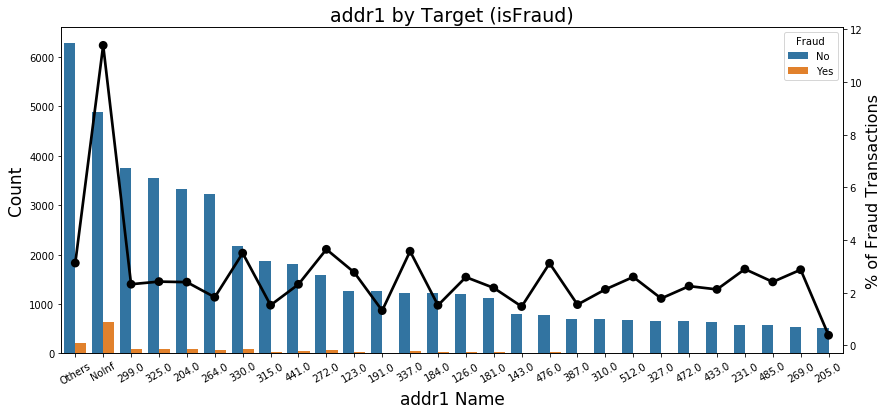

In [20]:
Distribution_feature_fraud(df_IEEE.copy(), 'addr1', rotation = 30, feature_distribution=False)

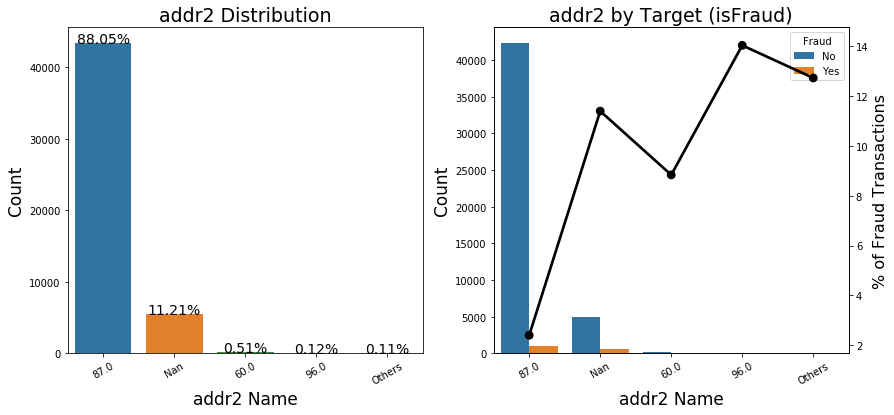

In [21]:
Distribution_feature_fraud(df_IEEE.copy(), 'addr2', rotation = 30, feature_distribution=True)

Almost all entries in Addr2 are in the same value (87).

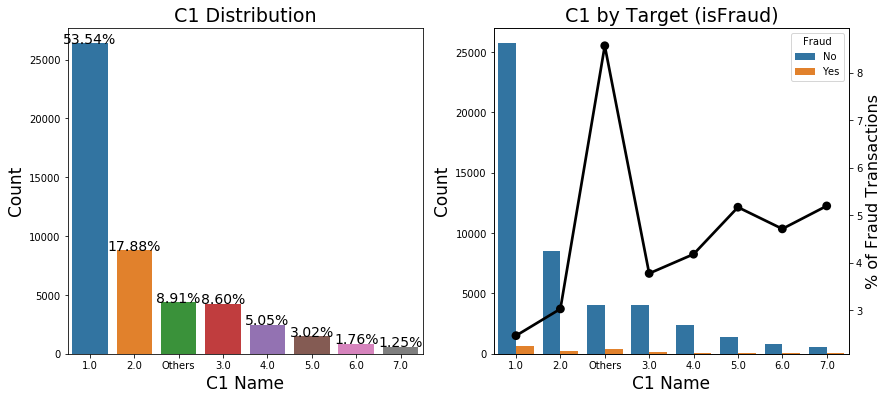

In [22]:
Distribution_feature_fraud(df_IEEE.copy(), 'C1', rotation = 0, feature_distribution=True)

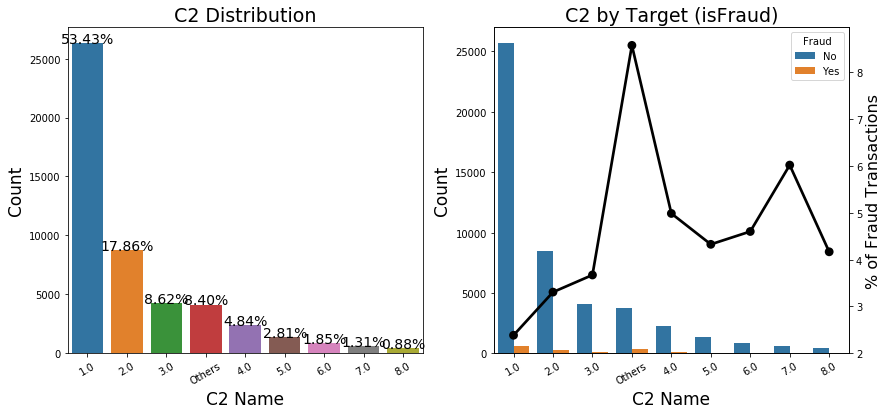

In [23]:
Distribution_feature_fraud(df_IEEE.copy(), 'C2', rotation = 30, feature_distribution=True)

In [24]:
del df_IEEE

# Feature Engineering and Training 

### Load Data

In [2]:
df_IEEE = pd.read_csv('Data/Sampled_IEEE_data.csv')

# Reduce the memory usage of the input dataframe
#df_IEEE = reduce_mem_usage(df_IEEE, verbose=True)
y = df_IEEE['isFraud']
X = df_IEEE.drop(columns = 'isFraud', axis = 1)

In [3]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 1985)
#del df_IEEE

### Feature Engineering

In [4]:
#This function is used to generate new features
#Note that this function deals with train and test datasets to prevent form data leakage
X_train, X_test = Feature_Engineering(X_train, X_test)
# X_train = reduce_mem_usage(X_train, verbose=True)
# X_test = reduce_mem_usage(X_test, verbose=True)

### Principal Component Analysis for Dimensionality Reduction

There are about 339 v features in data. We are going to use PCA to reduce the dimmesion of these features 

In [5]:
#features started with v
#v_features = X_train.columns[54:393]
v_features = ['V' + str(i) for i in range(1, 340)]

The explained variance using 10 components is 95.0%


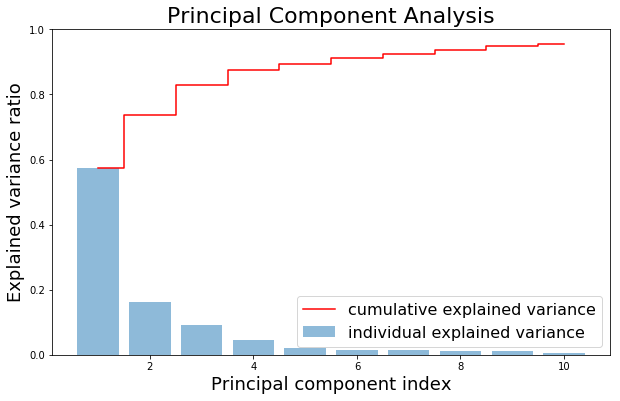

In [6]:
X_train, X_test = PCA_Dimensionality_Reduction(X_train.copy(),
                                               X_test.copy(), 
                                               v_features, 
                                               n_components=10, 
                                               plot_pca = True)

As seen using 10 components explains more than 95.0% of the variability in the data.

Hence, we use the 10 first principal components, instead of 339 v features, in dataframe.

### Missing Values

#### Drop columns with more than 90% missing values

In [8]:
X_train, X_test = data_cleaning_for_training(X_train, X_test)

#### Dealing with the rest of missing values

In [9]:
# Filling the rest of missing values
X_train, X_test = fill_na_values(X_train, X_test)

### Convert categorical variable into dummy/indicator variables.

In [10]:
X_train_dummy, X_test_dummy = Convert_categorical_variables(X_train, X_test)
X_train_LabelEncoder, X_test_LabelEncoder = Convert_LabelEncoder(X_train.copy(), X_test.copy())
print(X_train_dummy.shape, X_test_dummy.shape)
print(X_train_LabelEncoder.shape, X_test_LabelEncoder.shape)

(37500, 299) (12500, 299)
(37500, 100) (12500, 100)


# Training

## Logisitc Regression

### Training using logistic regression with the results of pd.get_dummies

In [37]:
run_status = False
if run_status:
    model_logistic_dummy, y_pred_logistic_dummy = logistic_regression_param_selection(X_train_dummy,
                                                                                      X_test_dummy,
                                                                                      y_train,
                                                                                      y_test,
                                                                                      nfolds = 5,
                                                                                      n_jobs = -1)
    results_LG_dummy = pd.DataFrame(y_test)
    results_LG_dummy.columns = ['Obs']
    results_LG_dummy['pred'] = list(y_pred_logistic_dummy)
    results_LG_dummy.to_csv('Data/y_pred_logistic_dummy.csv')
    #save the model to disk
    filename = 'model_logistic_dummy.sav'
    pickle.dump(model_logistic_dummy, open(filename, 'wb'))

-------------------------- Results for Logistic Regression (pd.get_dummies) --------------------------
roc_auc_score for test set is: 0.57
recall_score for test set is: 0.14
precision_score for test set is: 0.41
f1_score for test set is: 0.21
accuracy_score for test set is: 0.96


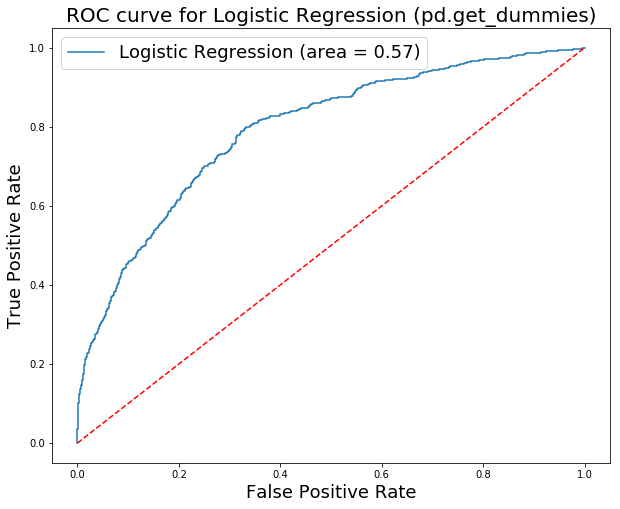

In [112]:
#load the model
y_obs = y_test
filename = 'Data/model_logistic_dummy.sav'
X = X_test_dummy
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X)
model_name = 'Logistic Regression (pd.get_dummies)'
print(f'-------------------------- Results for {model_name} --------------------------')
print('roc_auc_score for test set is:', round(roc_auc_score(y_test, y_pred),2))
print('recall_score for test set is:', round(recall_score(y_test, y_pred),2))
print('precision_score for test set is:', round(precision_score(y_test, y_pred),2))
print('f1_score for test set is:', round(f1_score(y_test, y_pred),2))
print('accuracy_score for test set is:', round(accuracy_score(y_test, y_pred),2))
plot_roc_curve(X = X, 
               y_obs = y_obs, 
               models = [loaded_model],
               title_name = f'ROC curve for {model_name}')

### Training using logistic regression with the results of LabelEncoder

In [38]:
run_status = False
if run_status:
    model_logistic_LabelEncoder, y_pred_logistic_LabelEncoder = logistic_regression_param_selection(X_train_LabelEncoder,
                                                                                      X_test_LabelEncoder,
                                                                                      y_train,
                                                                                      y_test,
                                                                                      nfolds = 5,
                                                                                      n_jobs = -1)
    results_LG_LabelEncoder = pd.DataFrame(y_test)
    results_LG_LabelEncoder.columns = ['Obs']
    results_LG_LabelEncoder['pred'] = list(y_pred_logistic_LabelEncoder)
    results_LG_LabelEncoder.to_csv('Data/y_pred_logistic_LabelEncoder.csv')
    #save the model to disk
    filename = 'model_logistic_LabelEncoder.sav'
    pickle.dump(model_logistic_LabelEncoder, open(filename, 'wb')) 
    

-------------------------- Results for Logistic Regression (LabelEncoder) --------------------------
roc_auc_score for test set is: 0.56
recall_score for test set is: 0.13
precision_score for test set is: 0.51
f1_score for test set is: 0.2
accuracy_score for test set is: 0.97


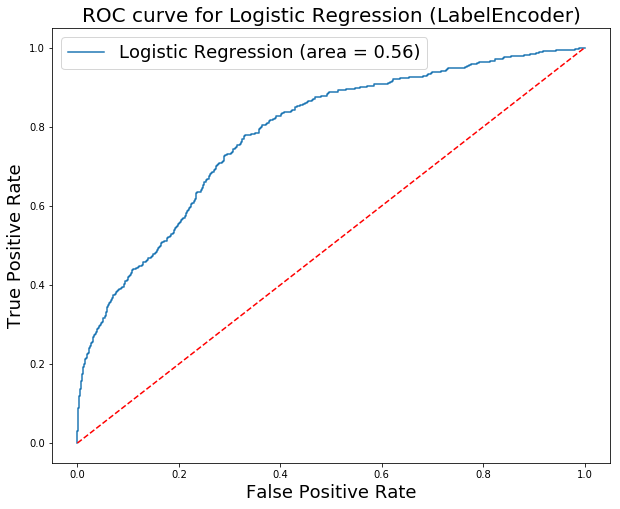

In [113]:
#load the model
y_obs = y_test
filename = 'Data/model_logistic_LabelEncoder.sav'
X = X_test_LabelEncoder
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X)
model_name = 'Logistic Regression (LabelEncoder)'
print(f'-------------------------- Results for {model_name} --------------------------')
print('roc_auc_score for test set is:', round(roc_auc_score(y_test, y_pred),2))
print('recall_score for test set is:', round(recall_score(y_test, y_pred),2))
print('precision_score for test set is:', round(precision_score(y_test, y_pred),2))
print('f1_score for test set is:', round(f1_score(y_test, y_pred),2))
print('accuracy_score for test set is:', round(accuracy_score(y_test, y_pred),2))
plot_roc_curve(X = X, 
               y_obs = y_obs, 
               models = [loaded_model],
               title_name = f'ROC curve for {model_name}')

## Random Forest

### Training using random forest with the results of pd.get_dummies

In [43]:
run_status = False
if run_status:
    model_RF_dummy, y_pred_RF_dummy = random_forest_param_selection(X_train_dummy,
                                                                    X_test_dummy,
                                                                    y_train,
                                                                    y_test,
                                                                    nfolds = 5,
                                                                    n_jobs = -1)
    results_RF_dummy = pd.DataFrame(y_test)
    results_RF_dummy.columns = ['Obs']
    results_RF_dummy['pred'] = list(y_pred_RF_dummy)
    results_RF_dummy.to_csv('Data/y_pred_RF_dummy.csv')
    #save the model to disk
    filename = 'model_RF_dummy.sav'
    pickle.dump(model_RF_dummy, open(filename, 'wb'))

The training roc_auc_score is: 0.821
The best parameters are: {'RF__n_estimators': 2000, 'RF__min_samples_split': 5, 'RF__min_samples_leaf': 2, 'RF__max_features': 'sqrt', 'RF__max_depth': 30, 'RF__bootstrap': True}
The test roc_auc_score is: 0.5


-------------------------- Results for Random Forest (pd.get_dummies) --------------------------
roc_auc_score for test set is: 0.63
recall_score for test set is: 0.26
precision_score for test set is: 0.84
f1_score for test set is: 0.4
accuracy_score for test set is: 0.97


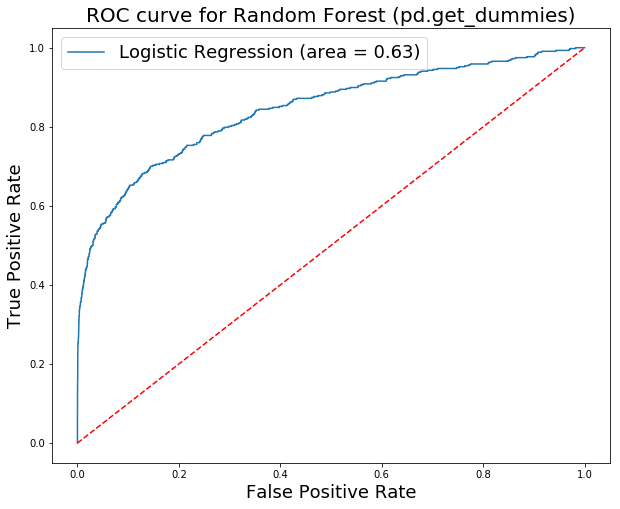

In [108]:
#load the model
y_obs = y_test
filename = 'Data/model_RF_dummy.sav'
X = X_test_dummy
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X)
model_name = 'Random Forest (pd.get_dummies)'
print(f'-------------------------- Results for {model_name} --------------------------')
print('roc_auc_score for test set is:', round(roc_auc_score(y_test, y_pred),2))
print('recall_score for test set is:', round(recall_score(y_test, y_pred),2))
print('precision_score for test set is:', round(precision_score(y_test, y_pred),2))
print('f1_score for test set is:', round(f1_score(y_test, y_pred),2))
print('accuracy_score for test set is:', round(accuracy_score(y_test, y_pred),2))
plot_roc_curve(X = X, 
               y_obs = y_obs, 
               models = [loaded_model],
               title_name = f'ROC curve for {model_name}')

### Training using random forest with the results of LabelEncoder

In [109]:
run_status = False
if run_status:
    model_RF_LabelEncoder, y_pred_RF_LabelEncoder = random_forest_param_selection(X_train_LabelEncoder,
                                                                           X_test_LabelEncoder,
                                                                           y_train,
                                                                           y_test,
                                                                           nfolds = 5,
                                                                           n_jobs = -1)
    results_RF_LabelEncoder = pd.DataFrame(y_test)
    results_RF_LabelEncoder.columns = ['Obs']
    results_RF_LabelEncoder['pred'] = list(y_pred_RF_LabelEncoder)
    results_RF_LabelEncoder.to_csv('Data/y_pred_RF_LabelEncoder.csv')
    #save the model to disk
    filename = 'model_RF_LabelEncoder.sav'
    pickle.dump(model_RF_LabelEncoder, open(filename, 'wb')) 

-------------------------- Results for Random Forest (LabelEncoder) --------------------------
roc_auc_score for test set is: 0.62
recall_score for test set is: 0.25
precision_score for test set is: 0.87
f1_score for test set is: 0.39
accuracy_score for test set is: 0.97


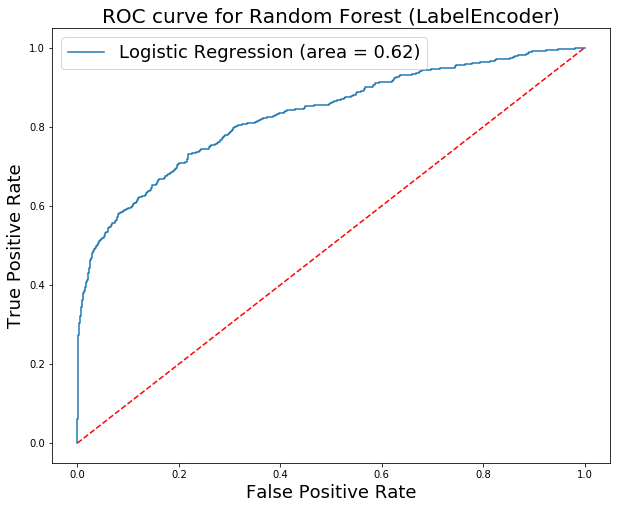

In [111]:
y_obs = y_test
filename = 'Data/model_RF_LabelEncoder.sav'
X = X_test_LabelEncoder
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X)
model_name = 'Random Forest (LabelEncoder)'
print(f'-------------------------- Results for {model_name} --------------------------')
print('roc_auc_score for test set is:', round(roc_auc_score(y_test, y_pred),2))
print('recall_score for test set is:', round(recall_score(y_test, y_pred),2))
print('precision_score for test set is:', round(precision_score(y_test, y_pred),2))
print('f1_score for test set is:', round(f1_score(y_test, y_pred),2))
print('accuracy_score for test set is:', round(accuracy_score(y_test, y_pred),2))
plot_roc_curve(X = X, 
               y_obs = y_obs, 
               models = [loaded_model],
               title_name = f'ROC curve for {model_name}')

### Logisstic or Random Forest?

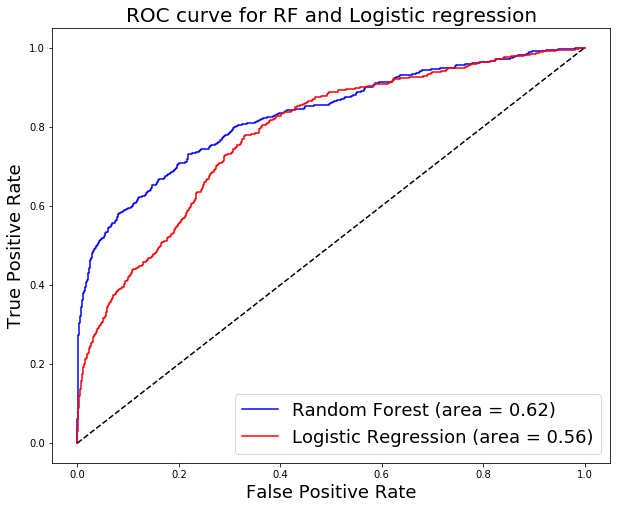

In [130]:
y_obs = y_test
filename_RF = 'Data/model_RF_LabelEncoder.sav'
filename_logisstic = 'Data/model_logistic_LabelEncoder.sav'
X = X_test_LabelEncoder
# load the model from disk
loaded_model_RF = pickle.load(open(filename_RF, 'rb'))
loaded_model_logisstic = pickle.load(open(filename_logisstic, 'rb'))
model_name = 'RF and Logistic regression'
plot_roc_curve(X = X, 
               y_obs = y_obs, 
               models = [loaded_model_RF, loaded_model_logisstic],
               title_name = f'ROC curve for {model_name}',
               legend_names = ['Random Forest', 'Logistic Regression'], 
               colors = ['b', 'r'])

## Dealing with imbalanced dataset

### 1. Oversampling the minority class
Oversampling can be defined as adding more copies of the minority class.

Oversampling can be a good choice when there are not a lrage number of data points to work with.

In [149]:
X_train_LabelEncoder_over, y_train_over = imbalance_sampling_data(X_train_LabelEncoder,
                                                          y_train,
                                                          sampling_method = 'Oversampling')

In [114]:
run_status = False
if run_status:
    model_RF_dummy_over, y_pred_RF_LabelEncoder_over = random_forest_param_selection(X_train_LabelEncoder_over,
                                                                           X_test_LabelEncoder,
                                                                           y_train_over,
                                                                           y_test,
                                                                           nfolds = 5,
                                                                           n_jobs = -1)
    results_RF_LabelEncoder_over = pd.DataFrame(y_test)
    results_RF_LabelEncoder_over.columns = ['Obs']
    results_RF_LabelEncoder_over['pred'] = list(y_pred_RF_LabelEncoder_over)
    results_RF_LabelEncoder_over.to_csv('Data/y_pred_RF_LabelEncoder_over.csv')
    #save the model to disk
    filename = 'model_RF_dummy_over.sav'
    pickle.dump(model_RF_dummy_over, open(filename, 'wb')) 

-------------------------- Results for Random Forest (Oversampling) --------------------------
roc_auc_score for test set is: 0.56
recall_score for test set is: 0.11
precision_score for test set is: 0.92
f1_score for test set is: 0.2
accuracy_score for test set is: 0.97


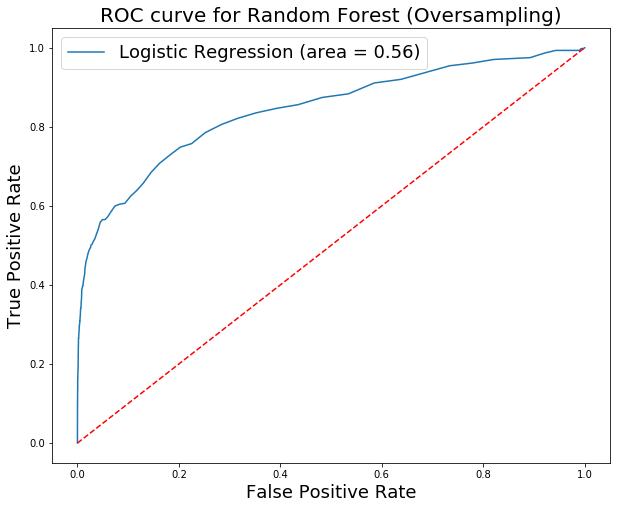

In [115]:
y_obs = y_test
filename = 'Data/model_RF_dummy_over.sav'
X = X_test_LabelEncoder
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X)
model_name = 'Random Forest (Oversampling)'
print(f'-------------------------- Results for {model_name} --------------------------')
print('roc_auc_score for test set is:', round(roc_auc_score(y_test, y_pred),2))
print('recall_score for test set is:', round(recall_score(y_test, y_pred),2))
print('precision_score for test set is:', round(precision_score(y_test, y_pred),2))
print('f1_score for test set is:', round(f1_score(y_test, y_pred),2))
print('accuracy_score for test set is:', round(accuracy_score(y_test, y_pred),2))
plot_roc_curve(X = X, 
               y_obs = y_obs, 
               models = [loaded_model],
               title_name = f'ROC curve for {model_name}')

### 2. Undersampling the majority class
Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when there is a large number of datapoints for training. 

The drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.

In [11]:
X_train_LabelEncoder_under, y_train_under = imbalance_sampling_data(X_train_LabelEncoder,
                                                          y_train,
                                                          sampling_method = 'Undersampling')

In [12]:
run_status = True
if run_status:
    model_RF_LabelEncoder_under, y_pred_RF_LabelEncoder_under = random_forest_param_selection(X_train_LabelEncoder_under,
                                                                           X_test_LabelEncoder,
                                                                           y_train_under,
                                                                           y_test,
                                                                           nfolds = 5,
                                                                           n_jobs = None)
    results_RF_LabelEncoder_under = pd.DataFrame(y_test)
    results_RF_LabelEncoder_under.columns = ['Obs']
    results_RF_LabelEncoder_under['pred'] = list(y_pred_RF_LabelEncoder_under)
    results_RF_LabelEncoder_under.to_csv('Data/y_pred_RF_LabelEncoder_under.csv')
    #save the model to disk
    filename = 'model_RF_LabelEncoder_under.sav'
    pickle.dump(model_RF_LabelEncoder_under, open(filename, 'wb')) 

The training roc_auc_score is: 0.875
The best parameters are: {'n_estimators': 670, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': False}
The test roc_auc_score is: 0.73


-------------------------- Results for Random Forest (Undersampling) --------------------------
roc_auc_score for test set is: 0.74
recall_score for test set is: 0.85
precision_score for test set is: 0.08
f1_score for test set is: 0.14
accuracy_score for test set is: 0.63


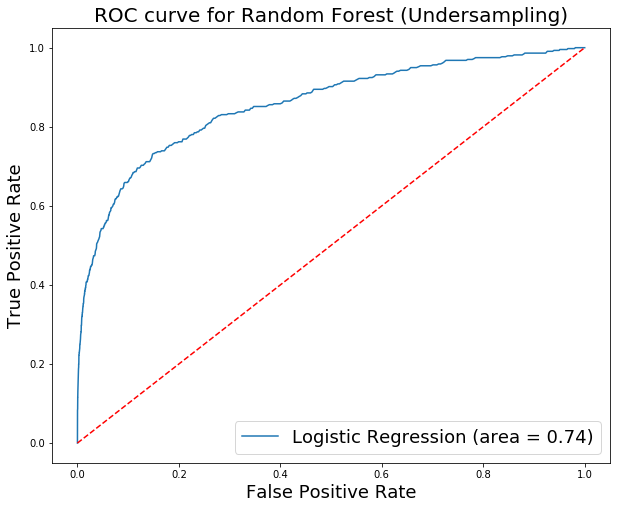

In [116]:
y_obs = y_test
filename = 'Data/model_RF_LabelEncoder_under.sav'
X = X_test_LabelEncoder
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X)
model_name = 'Random Forest (Undersampling)'
print(f'-------------------------- Results for {model_name} --------------------------')
print('roc_auc_score for test set is:', round(roc_auc_score(y_test, y_pred),2))
print('recall_score for test set is:', round(recall_score(y_test, y_pred),2))
print('precision_score for test set is:', round(precision_score(y_test, y_pred),2))
print('f1_score for test set is:', round(f1_score(y_test, y_pred),2))
print('accuracy_score for test set is:', round(accuracy_score(y_test, y_pred),2))
plot_roc_curve(X = X, 
               y_obs = y_obs, 
               models = [loaded_model],
               title_name = f'ROC curve for {model_name}')

### Feature Importance

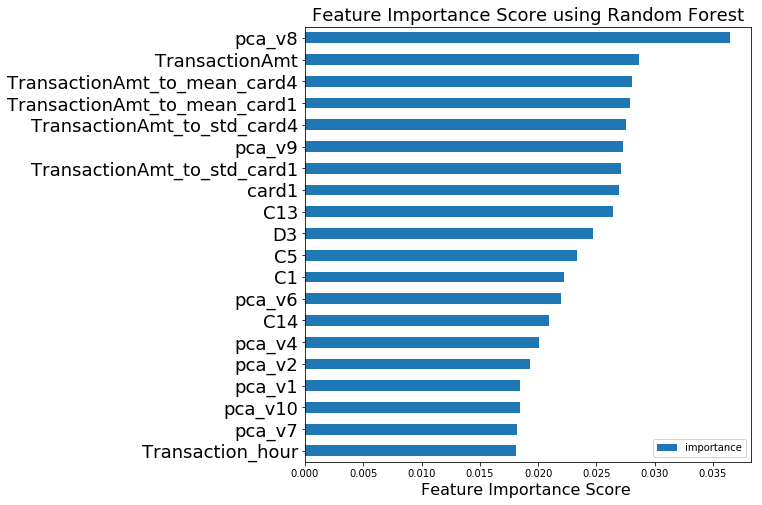

In [83]:
feature_importance = plot_feature_importances(model_RF_LabelEncoder_under, X_train_LabelEncoder_under, y_train_under, 
                             top_n=20, figsize=(8,8), print_table=False,title="Feature Importances")

### 3. Generate synthetic samples
A technique similar to oversampling is to create synthetic samples. 

Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. 

SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

In [150]:
X_train_LabelEncoder_SMOTE, y_train_SMOTE = imbalance_sampling_data(X_train_LabelEncoder,
                                                          y_train,
                                                          sampling_method = 'SMOTE')

In [ ]:
run_status = False
if run_status:
    model_RF_LabelEncoder_SMOTE, y_pred_RF_LabelEncoder_SMOTE = random_forest_param_selection(X_train_LabelEncoder_SMOTE,
                                                                           X_test_LabelEncoder,
                                                                           y_train_SMOTE,
                                                                           y_test,
                                                                           nfolds = 5,
                                                                           n_jobs = -1)
    results_RF_LabelEncoder_SMOTE = pd.DataFrame(y_test)
    results_RF_LabelEncoder_SMOTE.columns = ['Obs']
    results_RF_LabelEncoder_SMOTE['pred'] = list(y_pred_RF_LabelEncoder_SMOTE)
    results_RF_LabelEncoder_SMOTE.to_csv('Data/y_pred_RF_LabelEncoder_SMOTE.csv')
    #save the model to disk
    filename = 'model_RF_LabelEncoder_SMOTE.sav'
    pickle.dump(model_RF_LabelEncoder_SMOTE, open(filename, 'wb'))     

-------------------------- Results for Random Forest (SMOTE) --------------------------
roc_auc_score for test set is: 0.66
recall_score for test set is: 0.33
precision_score for test set is: 0.59
f1_score for test set is: 0.42
accuracy_score for test set is: 0.97


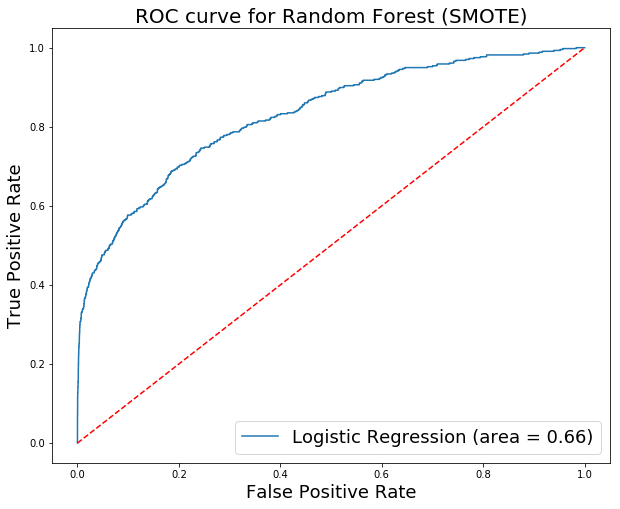

In [117]:
y_obs = y_test
filename = 'Data/model_RF_LabelEncoder_SMOTE.sav'
X = X_test_LabelEncoder
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X)
model_name = 'Random Forest (SMOTE)'
print(f'-------------------------- Results for {model_name} --------------------------')
print('roc_auc_score for test set is:', round(roc_auc_score(y_test, y_pred),2))
print('recall_score for test set is:', round(recall_score(y_test, y_pred),2))
print('precision_score for test set is:', round(precision_score(y_test, y_pred),2))
print('f1_score for test set is:', round(f1_score(y_test, y_pred),2))
print('accuracy_score for test set is:', round(accuracy_score(y_test, y_pred),2))
plot_roc_curve(X = X, 
               y_obs = y_obs, 
               models = [loaded_model],
               title_name = f'ROC curve for {model_name}')

### Which sampling Method?

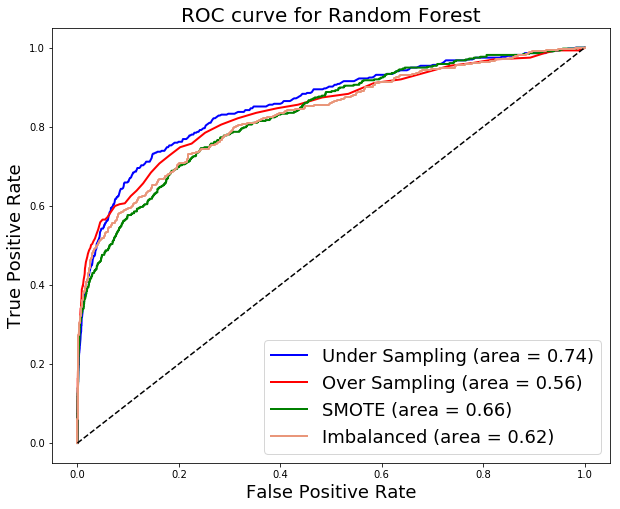

In [132]:
y_obs = y_test
filename_over = 'Data/model_RF_dummy_over.sav'
filename_under = 'Data/model_RF_LabelEncoder_under.sav'
filename_smote = 'Data/model_RF_LabelEncoder_SMOTE.sav'
filename_IMB = 'Data/model_RF_LabelEncoder.sav'

X = X_test_LabelEncoder
# load the model from disk
loaded_model_under = pickle.load(open(filename_under, 'rb'))
loaded_model_over = pickle.load(open(filename_over, 'rb'))
loaded_model_smote = pickle.load(open(filename_smote, 'rb'))
loaded_model_IMB = pickle.load(open(filename_IMB, 'rb'))
model_name = 'Random Forest'
plot_roc_curve(X = X, 
               y_obs = y_obs, 
               models = [loaded_model_under, loaded_model_over, loaded_model_smote, loaded_model_IMB],
               title_name = f'ROC curve for {model_name}',
               legend_names = ['Under Sampling', 'Over Sampling', 'SMOTE', "Imbalanced"], 
               colors = ['b', 'r', 'g', '#E9967A'])

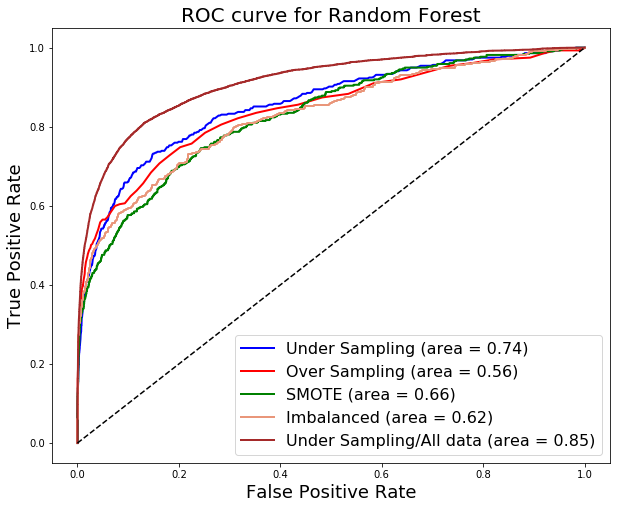

In [144]:
y_obs = y_test
filename_over = 'Data/model_RF_dummy_over.sav'
filename_under = 'Data/model_RF_LabelEncoder_under.sav'
filename_smote = 'Data/model_RF_LabelEncoder_SMOTE.sav'
filename_IMB = 'Data/model_RF_LabelEncoder.sav'

X = X_test_LabelEncoder
# load the model from disk
loaded_model_under = pickle.load(open(filename_under, 'rb'))
loaded_model_over = pickle.load(open(filename_over, 'rb'))
loaded_model_smote = pickle.load(open(filename_smote, 'rb'))
loaded_model_IMB = pickle.load(open(filename_IMB, 'rb'))
model_name = 'Random Forest'
plot_roc_curve(X = X, 
               y_obs = y_obs, 
               models = [loaded_model_under, loaded_model_over, loaded_model_smote, loaded_model_IMB],
               title_name = f'ROC curve for {model_name}',
               legend_names = ['Under Sampling', 'Over Sampling', 'SMOTE', "Imbalanced"], 
               colors = ['b', 'r', 'g', '#E9967A'])